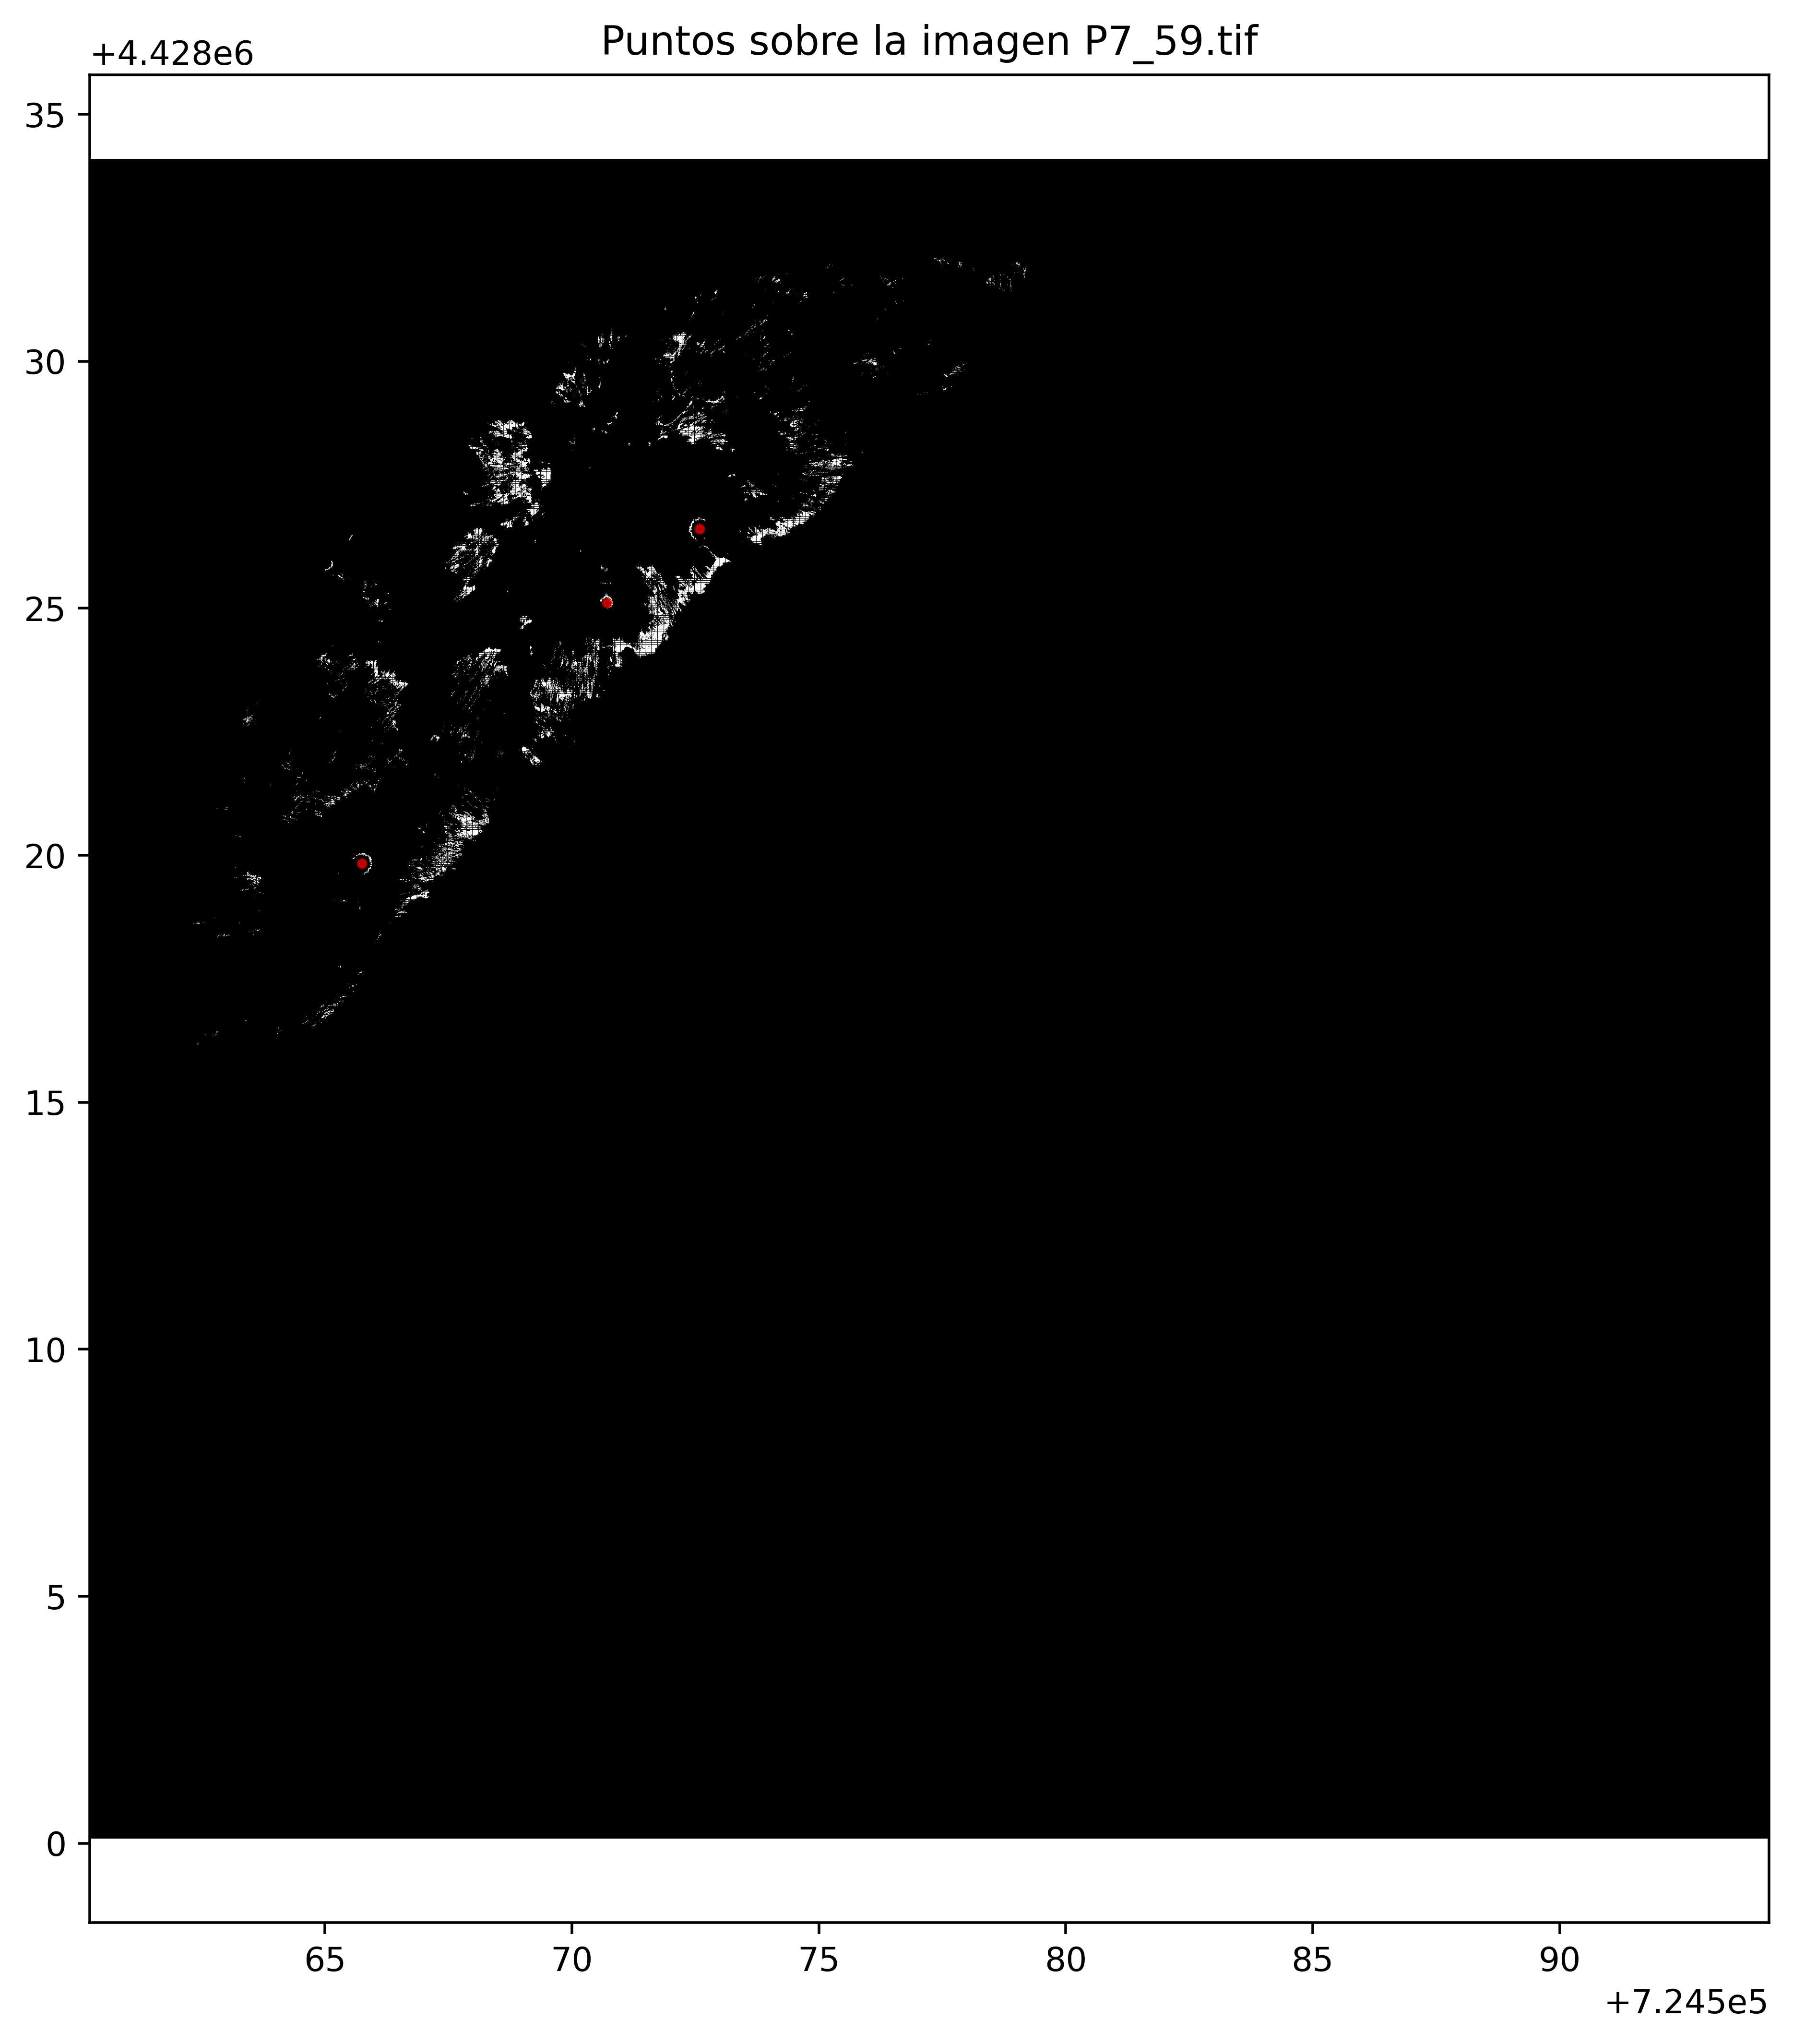

In [7]:
import os
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_points_on_geotiff(image_path, shapefile_path, output_path=None):
    """
    Superpone los puntos de un shapefile sobre una imagen GeoTIFF.
    
    Parameters:
    image_path (str): Ruta a la imagen GeoTIFF.
    shapefile_path (str): Ruta al archivo .shp que contiene los puntos.
    output_path (str, optional): Ruta para guardar la imagen con los puntos superpuestos.
                                 Si no se proporciona, solo se mostrará la imagen.
    """
    # Leer la imagen GeoTIFF
    with rasterio.open(image_path) as dataset:
        # Leer la imagen en formato NumPy array
        image = dataset.read(1)  # Leer la primera banda
        bounds = dataset.bounds
        crs = dataset.crs
        transform = dataset.transform

    # Leer los puntos del shapefile usando geopandas
    gdf = gpd.read_file(shapefile_path)

    # Verificar si el shapefile y el GeoTIFF tienen el mismo sistema de coordenadas
    if gdf.crs != crs:
        gdf = gdf.to_crs(crs)  # Reproyectar si es necesario

    # Crear una figura y un eje de matplotlib
    fig, ax = plt.subplots(figsize=(10, 10), dpi=500)

    # Mostrar la imagen GeoTIFF como fondo
    ax.imshow(image, extent=[bounds.left, bounds.right, bounds.bottom, bounds.top], cmap='gray')

    # Dibujar los puntos del shapefile sobre la imagen
    gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.6)

    # Añadir título
    ax.set_title(f"Puntos sobre la imagen {os.path.basename(image_path)}")

    # Guardar o mostrar la imagen con los puntos superpuestos
    if output_path:
        plt.savefig(output_path)
        print(f"Imagen guardada en: {output_path}")
    else:
        plt.show()

# Ejemplo de uso:
image_path = '/home/enrique/Desktop/VARIOS/TFM/tfm-identificacion-troncos/data/P7/1cm_maxint/P7_59.tif'
shapefile_path = '/home/enrique/Desktop/VARIOS/TFM/tfm-identificacion-troncos/data/manual_selection/P7/P7_59.shp'
plot_points_on_geotiff(image_path, shapefile_path)

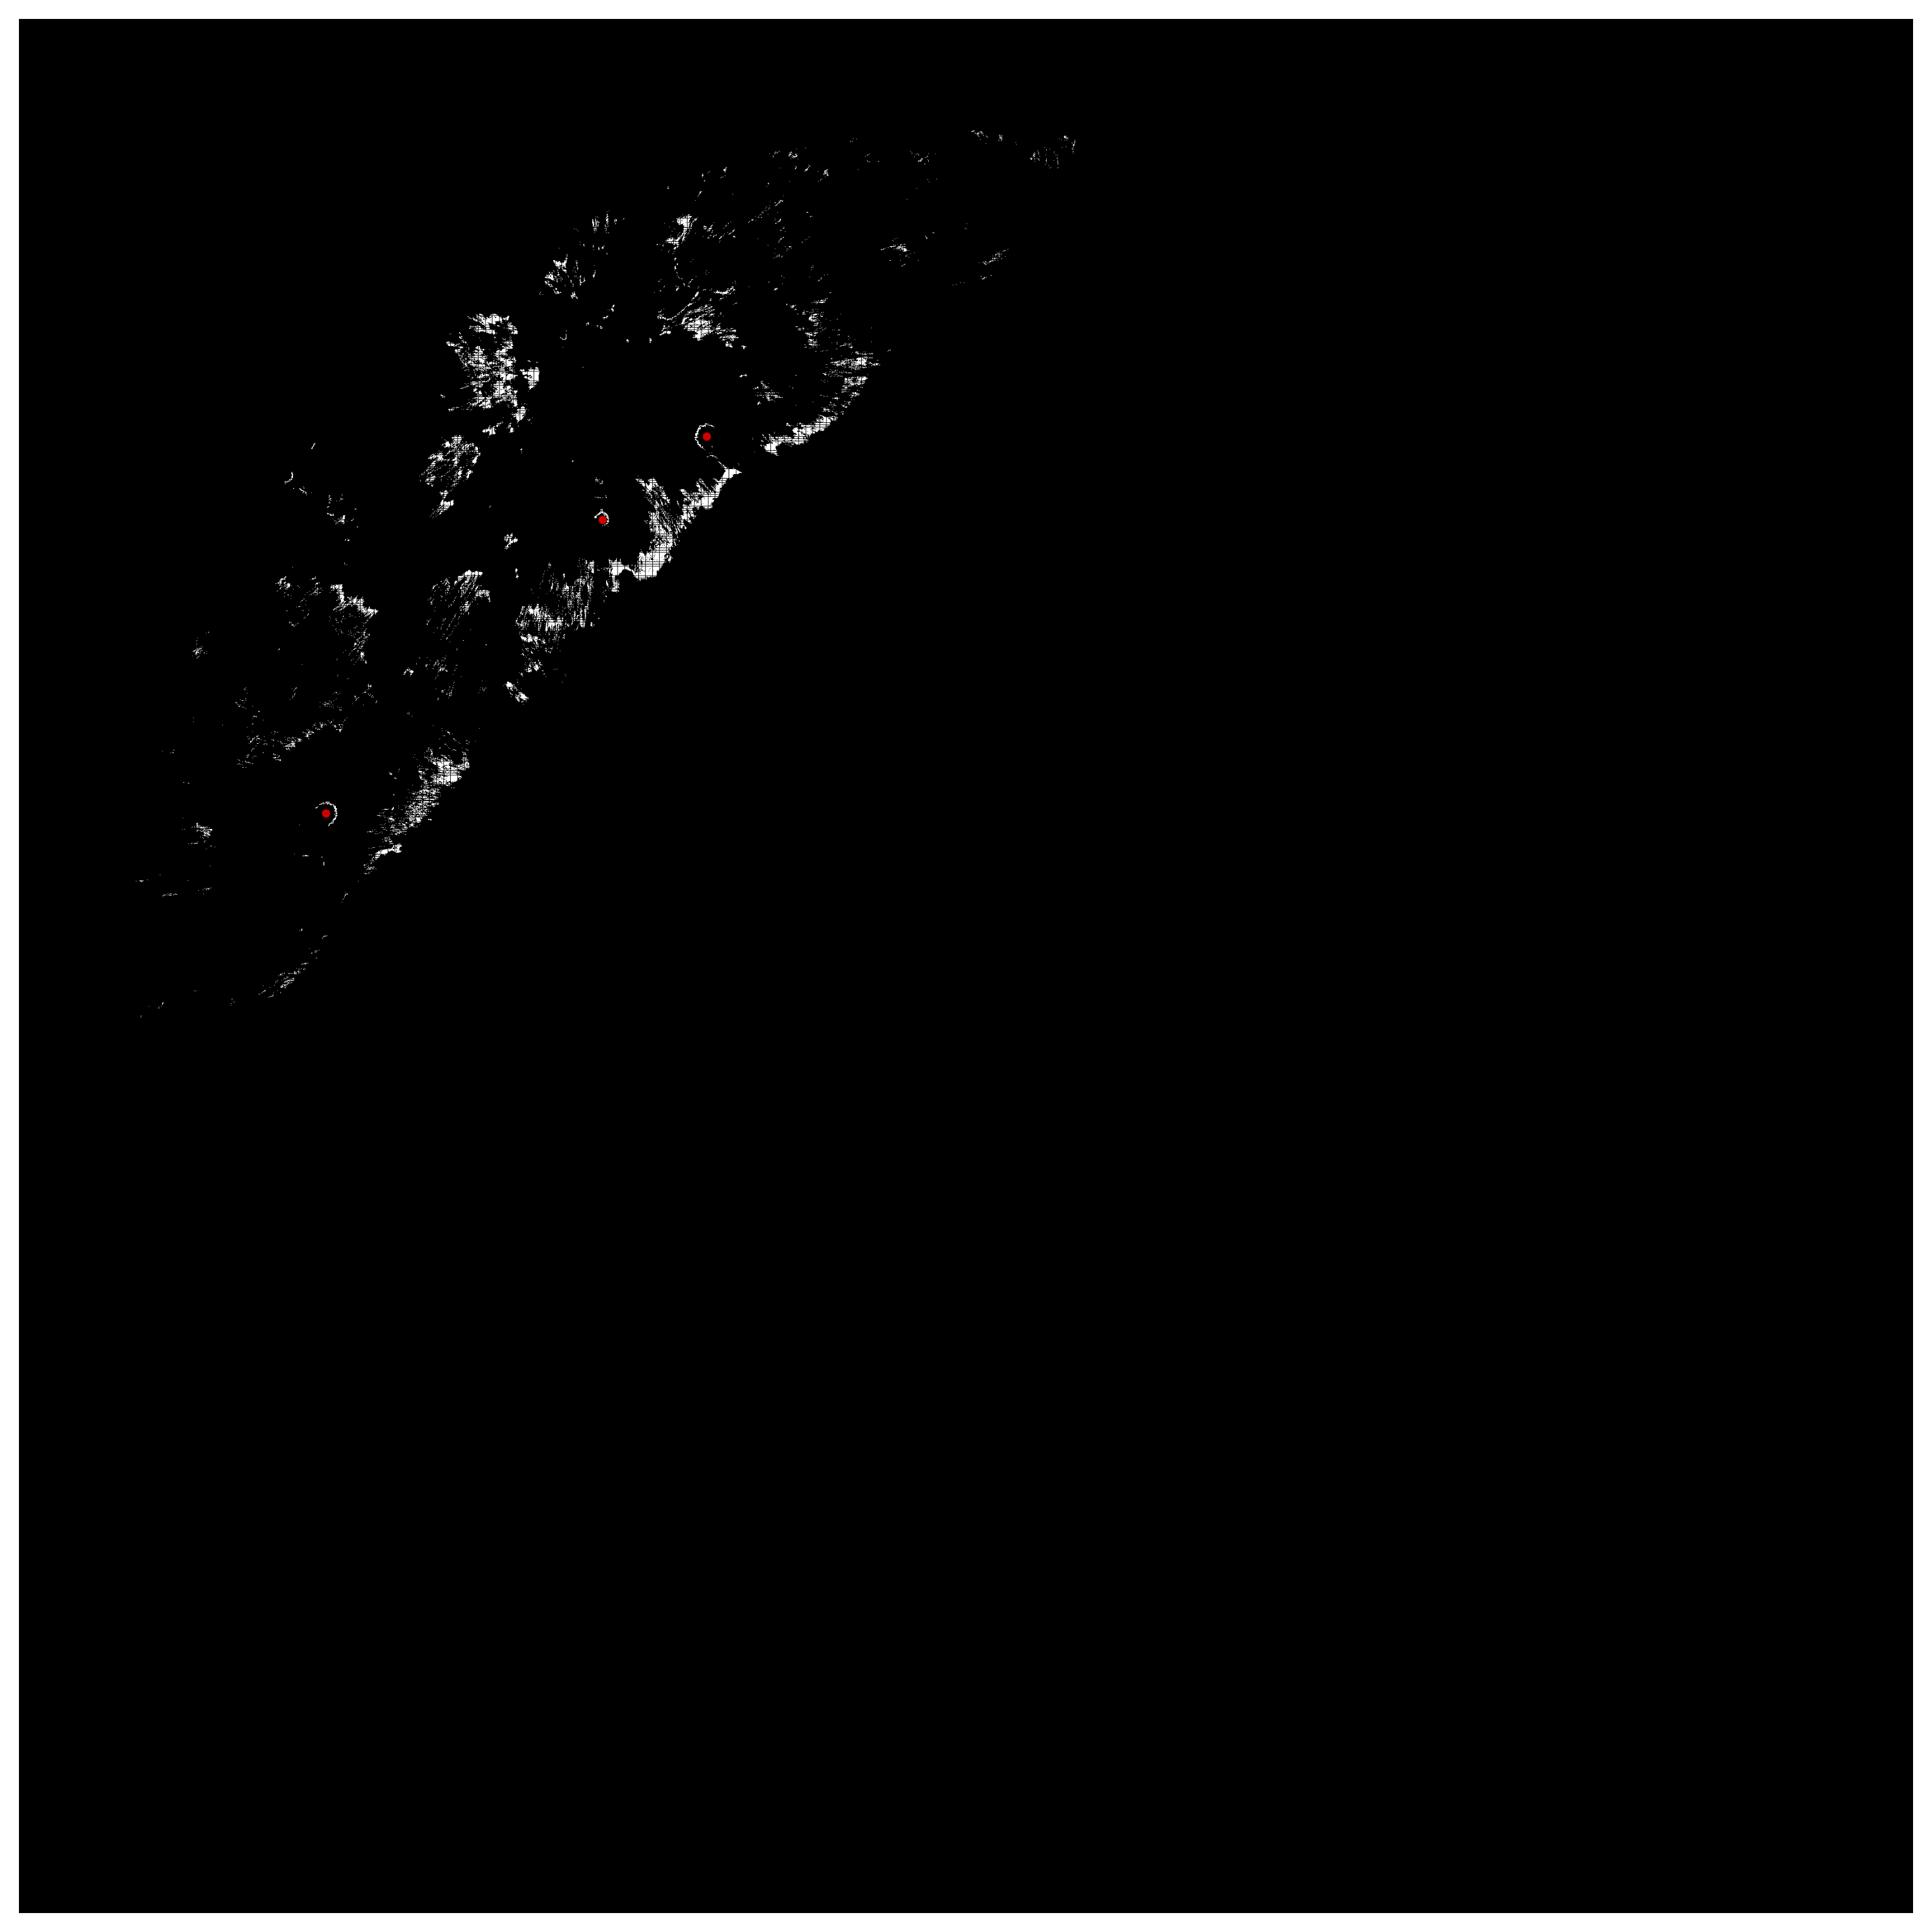

In [8]:
import os
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_points_on_geotiff(image_path, shapefile_path):
    """
    Superpone los puntos de un shapefile sobre una imagen GeoTIFF y muestra el resultado sin ejes ni texto.
    
    Parameters:
    image_path (str): Ruta a la imagen GeoTIFF.
    shapefile_path (str): Ruta al archivo .shp que contiene los puntos.
    """
    # Leer la imagen GeoTIFF
    with rasterio.open(image_path) as dataset:
        image = dataset.read(1)  # Leer la primera banda
        bounds = dataset.bounds
        crs = dataset.crs

    # Leer los puntos del shapefile usando geopandas
    gdf = gpd.read_file(shapefile_path)

    # Verificar si el shapefile y el GeoTIFF tienen el mismo sistema de coordenadas
    if gdf.crs != crs:
        gdf = gdf.to_crs(crs)  # Reproyectar si es necesario

    # Crear una figura y un eje de matplotlib
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)  # Ajusta el tamaño y resolución

    # Mostrar la imagen GeoTIFF como fondo sin ejes
    ax.imshow(image, extent=[bounds.left, bounds.right, bounds.bottom, bounds.top], cmap='gray')
    ax.axis('off')  # Eliminar ejes

    # Dibujar los puntos del shapefile sobre la imagen
    gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7)

    # Ajustar los límites del plot para que coincidan exactamente con la imagen
    ax.set_xlim(bounds.left, bounds.right)
    ax.set_ylim(bounds.bottom, bounds.top)

    # Mostrar la imagen con los puntos superpuestos
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Elimina márgenes
    plt.show()

# Ejemplo de uso en el notebook:
image_path = '/home/enrique/Desktop/VARIOS/TFM/tfm-identificacion-troncos/data/P7/1cm_maxint/P7_59.tif'
shapefile_path = '/home/enrique/Desktop/VARIOS/TFM/tfm-identificacion-troncos/data/manual_selection/P7/P7_59.shp'

plot_points_on_geotiff(image_path, shapefile_path)


### Approach 2

In [ ]:
import os
import json
import rasterio
import geopandas as gpd

def convert_shapefile_to_image_coords(image_path, shapefile_path, output_json_path):
    """
    Convierte los puntos de un shapefile a coordenadas de imagen utilizando la georreferenciación del GeoTIFF.
    
    Parameters:
    image_path (str): Ruta a la imagen GeoTIFF.
    shapefile_path (str): Ruta al archivo .shp que contiene los puntos.
    output_json_path (str): Ruta para guardar el archivo JSON con las coordenadas de los puntos.
    """
    # Leer la imagen GeoTIFF
    with rasterio.open(image_path) as dataset:
        transform = dataset.transform  # Transformación geoespacial del raster
        crs = dataset.crs

    # Leer los puntos del shapefile usando geopandas
    gdf = gpd.read_file(shapefile_path)

    # Verificar si el shapefile y el GeoTIFF tienen el mismo sistema de coordenadas
    if gdf.crs != crs:
        gdf = gdf.to_crs(crs)  # Reproyectar si es necesario

    # Convertir las coordenadas de los puntos a coordenadas de píxeles
    points_in_image_coords = []
    for point in gdf.geometry:
        x, y = point.x, point.y
        row, col = ~transform * (x, y)  # Inverso de la transformación para obtener filas y columnas
        points_in_image_coords.append({"x": int(col), "y": int(row)})

    # Guardar las coordenadas en un archivo JSON
    with open(output_json_path, 'w') as json_file:
        json.dump(points_in_image_coords, json_file, indent=4)
    
    print(f"Coordenadas de los puntos guardadas en: {output_json_path}")

# Ejemplo de uso
image_path = 'path/to/your/image.tif'
shapefile_path = 'path/to/your/shapefile.shp'
output_json_path = 'path/to/output/points.json'

convert_shapefile_to_image_coords(image_path, shapefile_path, output_json_path)
